## 截止日期：11月18日
作业的提交格式参考之前的说明，提交到2120220594@nankai.edu.cn

## 基本要求
a) 采用分层采样的方式将数据集划分为训练集和测试集。 b) 给定编写一个朴素贝叶斯分类器，对测试集进行预测，计算分类准确率。

## 中级要求
使用测试集评估模型，得到混淆矩阵，精度，召回率，F值。

## 高级要求
在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值。

In [169]:
# -*- coding: UTF-8 -*-
import math
import numpy as np  
import pandas as pd

f = open('wine.data','r')
types = [[],[],[]]                      #按类分的所有数据
test_data = [[],[],[]]
train_data = [[],[],[]]
data_num = 0                            #数据总数
test_len = []                           #测试集里每一类的个数
means = [[],[],[]]                      #每一类的均值
std = [[],[],[]]                        #每一类的标准差
myline = '1'
while myline:
    myline = f.readline().split(',')
    if len(myline) != 14:
        break
    for t in range(len(myline)):
        if t == 0:
            myline[t] = int(myline[t])
        else:
            myline[t] = float(myline[t])
    #删除列表中第一个元素
    temp = myline.pop(0)
    types[temp - 1].append(myline)
test_len = [round(len(types[i]) / 10) for i in range(3)]
data_num = sum([len(types[i]) for i in range(3)])
print("test_len:",test_len)
print("data_num:",data_num)

#即test_data的数量为原始数据集的十分之一 
# Todo： 分层抽样
import random
random.seed(25)
for i in range(3):
    test_data[i] = random.sample(types[i],test_len[i])
    train_data[i] = [x for x in types[i] if x not in test_data[i]]
print("分层抽样")
print(f"Row_data:\t{len(types[0])}\t{len(types[1])}\t{len(types[2])}")
print(f"Test_data:\t{len(test_data[0])}\t{len(test_data[1])}\t{len(test_data[2])}")
print(f"Train_data:\t{len(train_data[0])}\t{len(train_data[1])}\t{len(train_data[2])}")

test_len: [6, 7, 5]
data_num: 178
分层抽样
Row_data:	59	71	48
Test_data:	6	7	5
Train_data:	53	64	43


In [170]:
# 极大似然估计
# 输入n*2维数据
def LikelyHood(X):
    mu = np.mean(X, axis=0)
    # python把向量转化成矩阵需要用reshape
    cov = np.array([np.dot((X[i] - mu).reshape(len(X[i]),1), (X[i] - mu).reshape(1, len(X[i]))) for i in range(len(X))]).mean(axis=0)
    return mu, cov

# 在公式中，x和mean应该是列向量，但是为了方便，这里接收的都是行向量（维度：1*2）
def Gaussian_function(x, mu, cov):
    det_cov = np.linalg.det(cov)  # 计算方差矩阵的行列式
    inv_cov = np.linalg.pinv(cov)  # 计算方差矩阵的逆
    # 计算概率p(x|w)
    p = 1 / (2 * np.pi * np.sqrt(det_cov)) * np.exp(-0.5 * np.dot(np.dot((x - mu), inv_cov), (x - mu).T))
    return p

#分别计算训练集上三个类的均值和标准差
means=[]
stds=[]
mean,std=LikelyHood(train_data[0])
print(f"mean:\t{mean.shape} \t std{std.shape}")
means.append(mean)
stds.append(std)
mean,std=LikelyHood(train_data[1])
means.append(mean)
stds.append(std)
mean,std=LikelyHood(train_data[2])
means.append(mean)
stds.append(std)
#means stds

mean:	(13,) 	 std(13, 13)


In [171]:
def bayes_classificate():
    # 首先，分别计算训练集上三个类的均值和标准差
    # mean = 上述
    # std = 上述
    wrong_num = 0
    for i in range(3):
        for t in test_data[i]:                  #两层循环：从每一类取每一个测试样本
            my_type = []
            for j in range(3):
                #由于数据集中所有的属性都是连续值，连续值的似然估计可以按照高斯分布来计算：
                # temp = gaussian_function
                temp= Gaussian_function(t,means[j],stds[j])
                my_type.append(temp)                        #这里将所有score保存
            pre_type = my_type.index(max(my_type))          #取分值最大的为预测类别
            print("预测：%d \t 实际：%d" %(pre_type, i))
            if pre_type != i:                               #统计错误数
                wrong_num+=1
    return wrong_num
bayes_classificate()

预测：0 	 实际：0
预测：0 	 实际：0
预测：0 	 实际：0
预测：0 	 实际：0
预测：0 	 实际：0
预测：0 	 实际：0
预测：1 	 实际：1
预测：1 	 实际：1
预测：1 	 实际：1
预测：1 	 实际：1
预测：1 	 实际：1
预测：1 	 实际：1
预测：1 	 实际：1
预测：1 	 实际：2
预测：2 	 实际：2
预测：2 	 实际：2
预测：2 	 实际：2
预测：2 	 实际：2


1

In [172]:
def Confusion_Matrix(index):
    #输出testdata[index]的混淆矩阵
    matrix= np.zeros((2,2))
    matrix=matrix.tolist()
    for i in range(3):
        for t in test_data[i]:                  #两层循环：从每一类取每一个测试样本
            my_type = []
            for j in range(3):
                #由于数据集中所有的属性都是连续值，连续值的似然估计可以按照高斯分布来计算：
                # temp = gaussian_function
                temp= Gaussian_function(t,means[j],stds[j])
                my_type.append(temp)                        #这里将所有score保存
            pre_type = my_type.index(max(my_type))          #取分值最大的为预测类别
            if pre_type != i:                               #统计错误数
                if index==i:
                    matrix[1][0]=matrix[1][0]+1 #false nagetive
                elif index!=i and pre_type== index: 
                    matrix[0][1]=matrix[0][1]+1# false positive
            else:
                if index==i:
                    matrix[0][0]=matrix[0][0]+1# right positive
    matrix[1][1]=test_len[0]+test_len[1]+test_len[2]-matrix[0][0]-matrix[0][1]-matrix[1][0]; #right negative
    return matrix
print("混淆矩阵")
for i in range(len(test_len)):
    print("Type %d 的混淆矩阵："%i)
    print(Confusion_Matrix(i))

混淆矩阵
Type 0 的混淆矩阵：
[[6.0, 0.0], [0.0, 12.0]]
Type 1 的混淆矩阵：
[[7.0, 1.0], [0.0, 10.0]]
Type 2 的混淆矩阵：
[[4.0, 0.0], [1.0, 13.0]]


In [173]:
def precision(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1])
def recall(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0])
def accuracy(matrix):
    return (matrix[0][0]+matrix[1][1])/(test_len[0]+test_len[1]+test_len[2])
def F_value(matrix):
    return 2/(1/precision(matrix)+1/recall(matrix))
for i in range(len(test_len)):
    print("Type %d 的混淆矩阵："%i)
    matrix=Confusion_Matrix(i)
    print(matrix)
    print(f"Type:{i}\t precision:{precision(matrix)}\t recall:{recall(matrix)}\t accuracy:{accuracy(matrix)}\t F:{F_value(matrix)}\n")

Type 0 的混淆矩阵：
[[6.0, 0.0], [0.0, 12.0]]
Type:0	 precision:1.0	 recall:1.0	 accuracy:1.0	 F:1.0

Type 1 的混淆矩阵：
[[7.0, 1.0], [0.0, 10.0]]
Type:1	 precision:0.875	 recall:1.0	 accuracy:0.9444444444444444	 F:0.9333333333333333

Type 2 的混淆矩阵：
[[4.0, 0.0], [1.0, 13.0]]
Type:2	 precision:1.0	 recall:0.8	 accuracy:0.9444444444444444	 F:0.8888888888888888



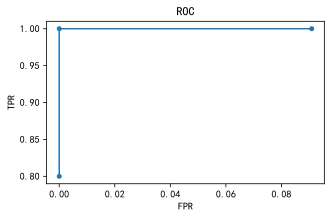

FPRs:
[0.0, 0.0, 0.09090909090909091]
TPRs:
[0.8, 1.0, 1.0]
AUC: 0.09090909090909091


In [174]:
class point:
    TPR
    FPR
    
def sortway(lists):
    return lists.TPR

points=[]
FPRs=[]
TPRs=[]
for i in range(len(test_len)):
    matrix=Confusion_Matrix(i)
    x=point()
    x.FPR=matrix[0][1]/(matrix[0][1]+matrix[1][1])
    x.TPR=matrix[0][0]/(matrix[0][0]+matrix[1][0])
    points.append(x)
points.sort(key=sortway)
for temppoint in points:
    TPRs.append(temppoint.TPR)
    FPRs.append(temppoint.FPR)
from matplotlib import pyplot as plt
%matplotlib inline
#让图像清晰
%config InlineBackend.figure_format = 'svg'
#设置画布大小像素点
plt.figure(figsize=(5,3),dpi=100)
plt.rc('font', family='SimHei', size=10)
plt.plot(FPRs,TPRs,marker='o',markersize=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show() 
print(f"FPRs:\n{FPRs}")
print(f"TPRs:\n{TPRs}")
#求积分
from scipy import integrate
v = integrate.trapz(TPRs, FPRs)
print("AUC:",v)